## Importing the Necessary Libraries and packages


This project is based on calculating ROI for the housing investment in Colorado state to provide detailed analysis and insights to investors who are interested in real estate for financial growth. 

In [1]:
# Importing what we need 
import numpy as np 
e = np.e
import pandas as pd 
import matplotlib
import statsmodels.api as sm 
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import warnings
warnings.filterwarnings('ignore')


zillow_data = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv')


In [2]:
zillow_data

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,country,NaN,108664.065693,108495.494517,108555.058209,108761.899002,109009.495097,...,3.222949e+05,3.274460e+05,3.322765e+05,3.380737e+05,3.441146e+05,3.505894e+05,3.547922e+05,3.575484e+05,3.571822e+05,3.560541e+05
1,394913,1,"New York, NY",msa,NY,188522.820365,186806.224260,186420.908986,186104.869066,185996.861284,...,5.752671e+05,5.778075e+05,5.828171e+05,5.884353e+05,5.986090e+05,6.075799e+05,6.153677e+05,6.196320e+05,6.212173e+05,6.201460e+05
2,753899,2,"Los Angeles, CA",msa,CA,186551.889182,185884.482490,185593.319105,185569.693864,185438.928720,...,8.618814e+05,8.742798e+05,8.874822e+05,9.017259e+05,9.307533e+05,9.501436e+05,9.551737e+05,9.329924e+05,9.291002e+05,8.978644e+05
3,394463,3,"Chicago, IL",msa,IL,147298.360904,147297.582443,146377.081265,147798.200258,148327.514646,...,2.902190e+05,2.919124e+05,2.947272e+05,2.985795e+05,3.039869e+05,3.087108e+05,3.139395e+05,3.149913e+05,3.140856e+05,3.124867e+05
4,394514,4,"Dallas, TX",msa,TX,113332.216364,113247.780650,113568.228432,114097.096793,114336.579284,...,3.445580e+05,3.513370e+05,3.600336e+05,3.706116e+05,3.766840e+05,3.918650e+05,3.997851e+05,4.014273e+05,3.970744e+05,3.915675e+05
5,394692,5,"Houston, TX",msa,TX,111418.403847,111233.624579,111280.800650,111590.188011,111747.515642,...,2.792502e+05,2.830569e+05,2.865825e+05,2.923535e+05,2.998556e+05,3.060252e+05,3.108801e+05,3.137154e+05,3.139973e+05,3.125789e+05
6,395209,6,"Washington, DC",msa,VA,180568.271248,179741.802990,179539.106252,179153.384984,179108.537893,...,5.268735e+05,5.308969e+05,5.352595e+05,5.435144e+05,5.503836e+05,5.561739e+05,5.593340e+05,5.575390e+05,5.547771e+05,5.515041e+05
7,394856,7,"Miami, FL",msa,FL,111753.275587,111996.585525,112168.570964,112212.147075,112368.921530,...,3.923883e+05,4.011900e+05,4.093559e+05,4.143337e+05,4.305135e+05,4.410818e+05,4.556336e+05,4.664508e+05,4.732752e+05,4.742908e+05
8,394974,8,"Philadelphia, PA",msa,PA,120985.022338,120120.356990,119673.770736,119387.227646,119681.555965,...,3.141546e+05,3.158997e+05,3.182565e+05,3.210919e+05,3.264942e+05,3.315225e+05,3.371536e+05,3.388768e+05,3.395989e+05,3.389144e+05
9,394347,9,"Atlanta, GA",msa,GA,123205.422159,123436.040760,123844.112975,124437.503794,124895.792073,...,3.402424e+05,3.478569e+05,3.541035e+05,3.597926e+05,3.693464e+05,3.780197e+05,3.826303e+05,3.854528e+05,3.841748e+05,3.830352e+05


In [3]:
# Taking a look at the shape of the dataset
print(zillow_data.shape)

# This line will tell us how many of our rows represent metro areas
print(zillow_data.RegionType.value_counts())

# Examining the first five rows of our dataframe
zillow_data.head()

(899, 325)
msa        898
country      1
Name: RegionType, dtype: int64


,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,country,NaN,108664.065693,108495.494517,108555.058209,108761.899002,109009.495097,...,322294.903229,327445.958954,332276.511803,338073.685771,344114.638771,350589.406051,354792.169033,357548.351856,357182.219270,356054.144014
1,394913,1,"New York, NY",msa,NY,188522.820365,186806.224260,186420.908986,186104.869066,185996.861284,...,575267.147045,577807.454168,582817.142771,588435.263286,598608.991473,607579.894997,615367.659459,619631.968470,621217.321721,620145.992454
2,753899,2,"Los Angeles, CA",msa,CA,186551.889182,185884.482490,185593.319105,185569.693864,185438.928720,...,861881.417343,874279.766711,887482.195789,901725.929478,930753.289617,950143.551902,955173.672577,932992.372762,929100.238917,897864.418850
3,394463,3,"Chicago, IL",msa,IL,147298.360904,147297.582443,146377.081265,147798.200258,148327.514646,...,290219.041432,291912.354888,294727.188283,298579.504671,303986.860603,308710.789295,313939.515379,314991.250548,314085.644474,312486.729429
4,394514,4,"Dallas, TX",msa,TX,113332.216364,113247.780650,113568.228432,114097.096793,114336.579284,...,344557.976761,351337.021321,360033.614446,370611.636209,376683.966527,391864.985419,399785.127705,401427.284760,397074.412395,391567.470647


So in the raw dataframe, we have 899 rows, with 325 columns. Of those 325 columns, 5 of them describe the metro area represented by each row. Columns 6 through 325 represent a time series that spans from January of 1996, to August of 2022. The values are the median home price for that metro area on that specific month.

Of our 899 rows, the first is the only row that represents a region other than a metro area, it tracks the median home price for the entire US.

## Filtering by Colorado


Our study is within Colorado State, so we need to filter down our raw dataframe to only look at metro area where 'CO' is designated for the StateName column. Therefore, we are filtering data for Colorado state only :



In [4]:
# Making a dataframe of just Colorado
zillow_data_co = zillow_data[zillow_data['StateName'] == 'CO']

# Seeing how many rows we get 
print(zillow_data_co.shape)

# Sanity check 
zillow_data_co.head()

(17, 325)


,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
19,394530,19,"Denver, CO",msa,CO,145065.622496,146030.620726,146745.439407,147501.011621,148330.325355,...,585276.746310,595974.651210,606864.432352,622796.196568,640199.990044,649573.150714,652142.268156,642781.053431,631267.381249,624225.899375
79,394484,79,"Colorado Springs, CO",msa,CO,132291.692435,132815.081731,133682.580734,135026.457851,136158.258653,...,456731.281360,465765.484262,470345.800389,477063.725158,483813.069221,496041.386784,499643.477315,497414.431265,489281.161782,483743.582969
149,394602,150,"Fort Collins, CO",msa,CO,163054.547633,163379.548768,164205.539638,164822.593773,165049.071541,...,529116.165416,540891.940723,548311.978271,557736.786316,569959.863902,584232.957037,593945.084179,590380.263583,580574.954966,573290.975791
153,394645,154,"Greeley, CO",msa,CO,150823.586191,153002.693085,153290.139058,157912.933725,158418.911950,...,492186.947345,494478.359497,499216.883003,520201.328693,530025.273275,541968.538779,542155.836979,540473.311000,538597.812077,536615.834182
155,394405,156,"Boulder, CO",msa,CO,188318.036345,188652.082514,188612.102688,188625.045872,189459.087320,...,737013.762919,752415.731847,766879.220221,776429.364803,805319.442582,825548.384030,836760.128692,811971.362327,796111.174744,791977.304893


After applying filter to our dataframe, we can see there are 17 metro areas with in Colorado state in our dataframe. 


In [5]:
# Checking our dataframe for NaN values
print(f'There are {zillow_data_co.isna().sum().sum()} NaNs in our original dataframe')

# Backfilling that single NaN
zillow_data_co.fillna(method='ffill', inplace=True)
zillow_data_co = zillow_data_co.copy()


# Sanity check
print(f'There are {zillow_data_co.isna().sum().sum()} NaNs after using forwardfill')

There are 568 NaNs in our original dataframe
There are 0 NaNs after using forwardfill


The entire dataframe has 568 NaN values that we had dealt with, and so we have applied forward fill technique to deal with those Nans.

## Price Distribution Within Colorado State

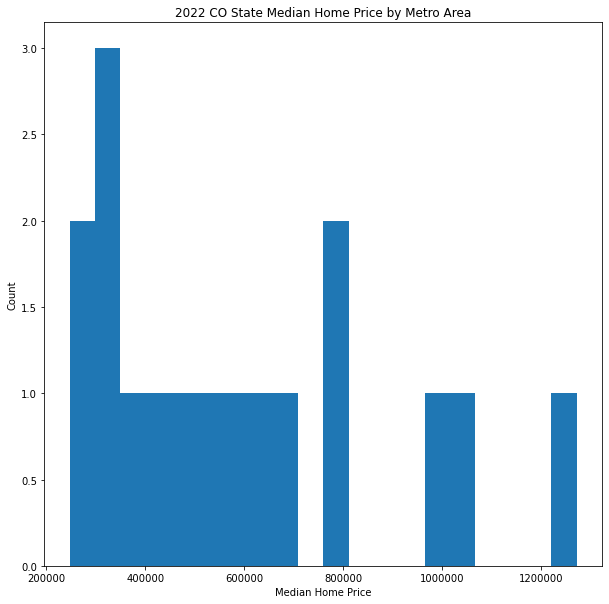

In [43]:
# Getting a list of the values for the last date in our time series
current_median_msa_home_prices = list(zillow_data_co['2022-08-31'])

# Plotting the results
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(current_median_msa_home_prices, bins=20)
ax.ticklabel_format(style='plain', axis='both')
plt.title('2022 CO State Median Home Price by Metro Area')
plt.xlabel('Median Home Price')
plt.ylabel('Count')
plt.show()

In the above graph, we can see there is one significant outlier, that we can see if for the Denver metro area, but we will confirm below. However, this does not necessarily mean that Denver is the best choice for investment, as our models may predict.

## Melt Data Function

In [7]:
# Checking the median home price for New York in the most recent month. 
int(zillow_data_co[zillow_data_co['RegionName'] == 'Denver, CO']['2022-08-31'])

624225

In [8]:
#Reshaping the data from Wide to Long Format 
def melt_data(zillow_data):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(zillow_data, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

## Time Series for all of Colorado State

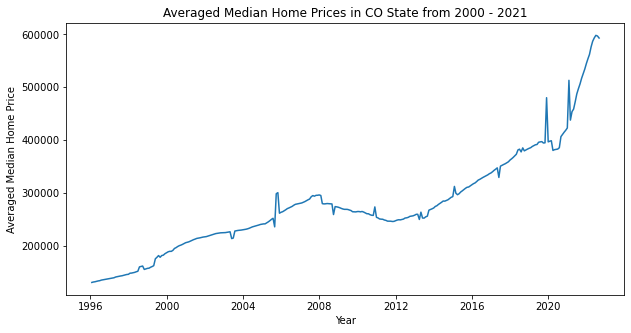

In [9]:
# Melting the CO dataframe
zillow_data_co_melted = melt_data(zillow_data_co)

# Plotting the average time series for all of CO state
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(zillow_data_co_melted)
plt.title('Averaged Median Home Prices in CO State from 2000 - 2021')
plt.xlabel('Year')
plt.ylabel('Averaged Median Home Price');

 ## Reshaping the Dataframe

Our data is currently stored in 'wide format' and for our time series models to run, we need to convert our data into 'long format' where the values are stored vertically.



In [10]:

zillow_data = pd.DataFrame()
for i in zillow_data_co['RegionName']:
    x = melt_data(zillow_data_co[zillow_data_co['RegionName'] == i])
    zillow_data = pd.concat([zillow_data, x], axis=1)
    zillow_data.rename(columns = {'value':i}, inplace = True)
    
zillow_data.head()

,"Denver, CO","Colorado Springs, CO","Fort Collins, CO","Greeley, CO","Boulder, CO","Pueblo, CO","Grand Junction, CO","Glenwood Springs, CO","Durango, CO","Edwards, CO","Montrose, CO","Ca-¦on City, CO","Breckenridge, CO","Fort Morgan, CO","Steamboat Springs, CO","Sterling, CO","Craig, CO"
time,,,,,,,,,,,,,,,,,
1996-01-31,145065.622496,132291.692435,163054.547633,150823.586191,188318.036345,84254.605780,111047.804141,166928.562519,166928.562519,244453.882796,95009.593917,95009.593917,95009.593917,95009.593917,160586.202440,70302.242029,66456.052724
1996-02-29,146030.620726,132815.081731,163379.548768,153002.693085,188652.082514,85056.522329,111745.130366,167844.751653,167844.751653,245512.716329,95863.465853,95863.465853,95863.465853,95863.465853,161532.056516,70800.546849,66718.433308
1996-03-31,146745.439407,133682.580734,164205.539638,153290.139058,188612.102688,85769.569179,112256.892079,167428.675702,167428.675702,246940.947249,96257.003793,96257.003793,96257.003793,96257.003793,162684.162527,71131.811467,67101.601565
1996-04-30,147501.011621,135026.457851,164822.593773,157912.933725,188625.045872,85923.713906,112674.206047,167688.258762,167688.258762,248352.663167,96869.177181,96869.177181,96869.177181,96869.177181,163230.245838,71510.696990,67602.866550
1996-05-31,148330.325355,136158.258653,165049.071541,158418.911950,189459.087320,86393.074565,112966.791104,170299.828998,170299.828998,249585.726294,97289.679462,97289.679462,97289.679462,97289.679462,164002.346476,71823.055074,67071.984738


## Shortening our Time Series

Check this language. There is a massive feature of our raw dataset that must be addressed. Colorado, like everywhere else in America, had its house prices slashed during the 2008 financial crisis. If we train our models on this entire dataset, our models might be overly influenced by this relatively rare crash, especially since our business use case requires we only look forward by one year. So to avoid hurting our models performance in validation tests and future predictions, we are going to only train our models on data from January of 2012 onward.

In [11]:
# Making a list of the column names that track prices from 2000 through the end of 2011
zillow_data_2012 = zillow_data['2012-01-31':]

# Examining the new shape
print(zillow_data_2012.shape)

# Sanity check
zillow_data_2012.head()

(128, 17)


,"Denver, CO","Colorado Springs, CO","Fort Collins, CO","Greeley, CO","Boulder, CO","Pueblo, CO","Grand Junction, CO","Glenwood Springs, CO","Durango, CO","Edwards, CO","Montrose, CO","Ca-¦on City, CO","Breckenridge, CO","Fort Morgan, CO","Steamboat Springs, CO","Sterling, CO","Craig, CO"
time,,,,,,,,,,,,,,,,,
2012-01-31,231985.626673,201264.723750,241313.201788,200732.848850,324722.044695,121979.855812,178990.906746,380042.049378,324681.345130,496230.489798,189618.942602,189618.942602,383082.575819,122724.504054,392395.021057,105708.849423,148325.783804
2012-02-29,232552.801479,200555.722392,242336.739225,202855.310054,330875.469267,121675.213831,177946.307982,380454.293328,324807.703148,495778.148761,189863.262300,189863.262300,383832.564698,122887.143310,393416.336565,105841.439127,148504.730645
2012-03-31,234047.384818,200783.687051,245748.338302,203665.158939,333809.849356,121471.028648,178643.116648,381169.763663,325573.743339,477672.157189,190297.364214,190297.364214,384683.718190,123205.778075,393601.399095,106275.687449,149102.100082
2012-04-30,236810.475862,201835.372094,246536.276015,204149.167371,334849.210012,121450.687131,180992.157600,381871.893856,326394.762052,479951.516934,190492.542194,190492.542194,385353.759860,123117.409622,394309.541572,106521.253304,148994.539758
2012-05-31,240079.514826,204027.375986,248191.089353,205345.527924,336510.321421,121392.075516,183248.598776,382534.077339,327283.472311,474094.674922,190740.999165,190740.999165,386513.933979,123388.355443,395021.777708,106729.162131,149545.300743


In [27]:
zillow_data_2012.tail()

,"Denver, CO","Colorado Springs, CO","Fort Collins, CO","Greeley, CO","Boulder, CO","Pueblo, CO","Grand Junction, CO","Glenwood Springs, CO","Durango, CO","Edwards, CO","Montrose, CO","Ca-¦on City, CO","Breckenridge, CO","Fort Morgan, CO","Steamboat Springs, CO","Sterling, CO","Craig, CO"
time,,,,,,,,,,,,,,,,,
2022-04-30,649573.150714,496041.386784,584232.957037,541968.538779,825548.384030,310620.373894,391017.563632,773008.921982,657523.055724,1.207362e+06,397681.884595,327293.154848,1.083077e+06,302289.565731,939959.399558,233853.379256,254644.956813
2022-05-31,652142.268156,499643.477315,593945.084179,542155.836979,836760.128692,311080.766616,390822.921107,783658.051197,671648.572454,1.233316e+06,404098.241551,325898.117753,1.103380e+06,304228.510370,941505.471658,234909.388601,255872.448858
2022-06-30,642781.053431,497414.431265,590380.263583,540473.311000,811971.362327,311762.143560,394572.353212,805626.480069,683650.060348,1.266309e+06,407118.149001,334037.894196,1.094257e+06,316436.527864,959512.759475,243952.700295,266349.042897
2022-07-31,631267.381249,489281.161782,580574.954966,538597.812077,796111.174744,311782.127375,395124.139064,808239.175143,681747.863203,1.289524e+06,409439.175086,332699.756040,1.056162e+06,318183.240146,993221.407995,245523.116036,268062.669082
2022-08-31,624225.899375,483743.582969,573290.975791,536615.834182,791977.304893,314011.943346,390219.027231,804291.317918,682118.676605,1.271878e+06,419752.370506,334442.861616,1.041836e+06,320263.429658,975230.099564,247172.678889,269442.290752


## Train Test Split

In order to validate our models and determine if our methods are effective, we will need to split our time series data into a train set and a test set. In the context of time series, the train will be the first 80% of our time series, and the test set will be the last 20%. Our post January 2012 data covers 9.75 years, meaning our train set will have a length of 7.8 years, and a test set of 2 years. This ratio of training data to test data will help to jusitfy the predictions we make for the the coming year. This is because if our models can accurately predict values 2 years out, based on 7.8 years of data, we can be more confident that our models accurately predict values 1 year from now, based on 9.75 years of data.

In [12]:
# Printing out the lengths of our unsplit time series 
print(f'Whole series lengths: {len(zillow_data_2012)} \n')

# Manually dividing the data into train and test sets
train = zillow_data_2012[:'2020-12-31']
test = zillow_data_2012['2020-12-31':]

# Printing the lengths of our new train and test sets
print(f'Train set lengths: {len(train)}')
print(f'Test set lengths: {len(test)} \n')

# Checking that the proportions are how we want them 
print(f'Train proportion = {round(len(train) / len(zillow_data_2012),1)}')
print(f'Test proportion = {round(len(test) / len(zillow_data_2012),1)} \n')

# Checking the length in years of our train and test sets
print(f'Train set length in years: {round(len(train) / 12, 2)}')
print(f'Test set length in years: {round(len(test) / 12, 2)}')

Whole series lengths: 128 

Train set lengths: 108
Test set lengths: 21 

Train proportion = 0.8
Test proportion = 0.2 

Train set length in years: 9.0
Test set length in years: 1.75


## Establishing a Performance Baseline Before Modeling

In order to determine whether or not modeling is even going to help in this business context, we will want to compare how well our models perform to the performance of a simple, EDA based approach.

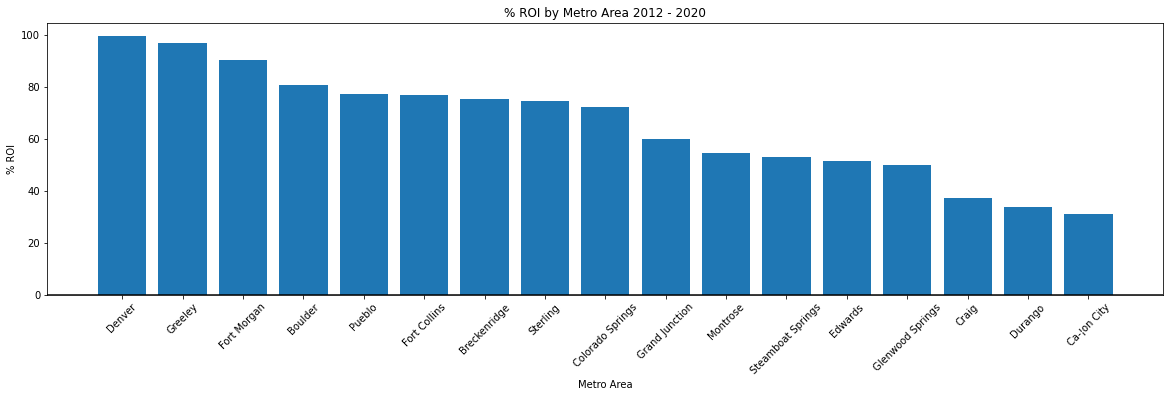

,% ROI
City,
Denver,99.73
Greeley,96.95
Fort Morgan,90.24
Boulder,80.80
Pueblo,77.20


In [46]:
# These lists will hold the names of each metro area, as well as that area's ROI from 2012 to 2022
names = []
historical_roi = []

# This for loop adds the information to the two lists
for i in range(len(train.columns)):
    
    clean_name = train.columns[i][:-4]
    
    initial_val = train[train.columns[i]]['2012-01-31']
    present_val = train[train.columns[i]]['2020-08-31']
    
    roi = round(((present_val - initial_val) / initial_val) * 100, 2)
    
    names.append(clean_name)
    historical_roi.append(roi)

# Turning the data into a pandas dataframe
roi_df = pd.DataFrame()
roi_df['City'] = names
roi_df['% ROI'] = historical_roi
roi_df.sort_values(['% ROI'], inplace=True, ascending=False)
roi_df.set_index('City', inplace=True)

# Plotting the historical data 
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(roi_df.index, roi_df['% ROI'])
plt.title('% ROI by Metro Area 2012 - 2020')
plt.xlabel('Metro Area')
plt.ylabel('% ROI')
plt.xticks(rotation=45)
plt.axhline(0, color='k')
plt.show()

# Displaying our top five choices based on EDA
roi_df.head()

Now that we know which 5 metro areas had the largest positive change in values from 2012 to 2020, we need to calculate how much net profit we would have made if we selected those five areas for investment in 2020. We will later compare this figure to our model evaluation results.

In [41]:
# Our top five choices based on EDA results
top_5 = ['Denver, CO', 'Greeley, CO', 'Fort Morgan, CO', 'Boulder, CO','Pueblo, CO']

# These two lists will track our buy and sell numbers
buys = []
sells = []

# Getting the median values for 2019 (buys) and 2021 (sells)
for i in top_5:
    buys.append(zillow_data_2012[i]['2020-08-31'])
    sells.append(zillow_data_2012[i]['2022-08-31'])

# Calculating the ROI we would have achieved
eda_roi = round( ((sum(sells) - sum(buys)) / sum(buys) ) * 100, 2)

# Printing the ROI
print(f'Using an EDA approach, we could have achieved {eda_roi}% ROI from 2020 to 2022')

Using an EDA approach, we could have achieved 36.49% ROI from 2020 to 2022


## Modeling

Because we want to find the five metro areas that are the most optimal for real estate investment within New York State, we are going to want to run time series models on every metro area individually. Doing this manually on all 26 quickly becomes unreasonable, so we are writing some functions to do the steps for us.

In [17]:
def log_transform(series_i):
    
    '''Takes in a series and returns the log transformed version of that series'''
    
    log_transformed = np.log(series_i)
    dropped_nans = log_transformed.dropna()
    return dropped_nans

In [18]:
def run_auto_arima(series_i):
    
    '''Runs a grid search on the series passed in, then instantiates and fits 
    an ARIMA model with those hyperparameters, then returns that fit model. '''
    
    gridsearch = auto_arima(series_i,
                            start_p = 0,
                            max_p = 3,
                            d = 0, 
                            max_d = 3, 
                            start_q = 0,
                            max_q = 3,
                            seasonal=True,
                            m = 12,
                            suppress_warnings=True)
    
    model = ARIMA(series_i, 
                  order = gridsearch.order, 
                  seasonal_order = gridsearch.seasonal_order,
                  enforce_stationarity=False)
    
    return model.fit()

In [19]:
def run_arima_model(i, steps, df):
    
    '''This function takes i, representing the index of one of our time series,
    steps, which is the number of periods after the end of the 
    sample you want to make a prediction for, and df, the dataframe the series
    is stored in. It log transforms the series, runs run_auto_arima, gets the 
    forecast from the fit model, and inverse log transforms that forecast series
    back into the original units.'''
    
    series = df.iloc[:, i:i+1]
    
    name = series.columns[0]
    
    log_series = log_transform(series)
    
    model = run_auto_arima(log_series)

    log_forecast = model.get_forecast(steps)
    forecast_series = e ** log_forecast.summary_frame()
    
    return name, series, forecast_series

In [20]:
def plot_results(i, steps, df):
    
    '''plot_results runs run_arima_model() and plots the results.'''
    
    name, original_series, forecast_series = run_arima_model(i, steps, df)

    fig, ax = plt.subplots(figsize=(15, 7))
    plt.plot(original_series)
    plt.plot(forecast_series['mean'])
    ax.fill_between(forecast_series.index, forecast_series['mean_ci_lower'], 
                    forecast_series['mean_ci_upper'], color='k', alpha=0.1)
    plt.title(name)
    plt.legend(['Original','Predicted'], loc='lower right')
    plt.xlabel('Year')
    plt.ylabel('Median Home Price')
    plt.show()
    
    forecast = round(forecast_series['mean'][11])
    low_int =  round(forecast_series['mean_ci_lower'][11])
    high_int = round(forecast_series['mean_ci_upper'][11])
    
    print(f'12 month forecast: {forecast}')
    print(f'95% confidence that the true future value is between {low_int}, and {high_int}')

In [24]:
def evaluate_models(df1, df2):
    
    '''This function takes in two dataframes (train and test in our case), 
    and returns a dataframe with how accurate the models fit to the train 
    set were in predicting the test set values.'''

    names = []
    actuals = []
    preds = []
    perc_errors = []
    
    for i in range(len(train.columns)):
        
        name, series, forecast_series = run_arima_model(i, 24, df1)
        
        clean_name = name[:-4]
        
        actual_val = df2[name][-1]
        predicted_val = forecast_series.iloc[23, 0]
        error = abs(actual_val - predicted_val)
        percent_error = (error/ actual_val) * 100
        
        names.append(clean_name)
        actuals.append(f'{round(actual_val):,}')
        preds.append(f'{round(predicted_val):,}')
        perc_errors.append(round(percent_error, 2))
        
        # print(train.columns[i][:-4], 'done', f'{i+1}/26')
        
    
    results_df = pd.DataFrame(index=names)
    results_df['2022 Actual'] = actuals 
    results_df['2022 Predicted'] = preds
    results_df['% Error'] = perc_errors
    results_df.sort_values(by='% Error', inplace=True)
    
    return results_df

In [25]:
def generate_predictions(df, steps):
    
    '''Similar to evaluate_models(), this function takes in a dataframe,
    and a specific number of steps, and returns a dataframe of the 
    future predictions the specified number of steps past the end of 
    the sample.'''
    
    names = []
    current_vals = []
    pred_vals = []
    net_profits = []
    ROI_strings = []
    
    count = 0
    for i in range(len(df.columns)):
        
        count += 1
        
        name, series, forecast = run_arima_model(i, steps, df)
        
        clean_name = name[:-4]
        print(clean_name)
        
        cur_val = series.iloc[-1, 0]
        pred_val = forecast.iloc[steps-1, 0]
        net_prof = round(pred_val - cur_val , 2)
        roi = int(round(((pred_val - cur_val) / cur_val) * 100, 2))
        
        names.append(clean_name)
        current_vals.append(f'{round(cur_val):,}')
        pred_vals.append(f'{round(pred_val):,}')
        net_profits.append(f'{round(net_prof):,}')
        ROI_strings.append(f'{roi}%') 
        
        if count == 26:
            break
    
    
    results_df = pd.DataFrame()
    results_df['City'] = names
    results_df.set_index(['City'])
    results_df['Current Value'] = current_vals
    results_df['Predicted Value'] = pred_vals
    results_df['Net Profit'] = net_profits
    results_df['ROI'] = ROI_strings
    
    return results_df

### Model Evaluation

In [26]:
# This dataframe will show us how accurate our models are 
eval_df = evaluate_models(train, test)

# Displaying the dataframe
eval_df

,2022 Actual,2022 Predicted,% Error
Pueblo,"314,012","305,485",2.72
Colorado Springs,"483,744","467,330",3.39
Grand Junction,"390,219","369,769",5.24
Sterling,"247,173","232,746",5.84
Denver,"624,226","568,198",8.98
Fort Morgan,"320,263","289,634",9.56
Boulder,"791,977","667,080",15.77
Montrose,"419,752","353,251",15.84
Fort Collins,"573,291","476,451",16.89
Greeley,"536,616","445,220",17.03


In [28]:
# Calculating the average error using the dataframe above 
average_error = str(round(sum([int(i) for i in eval_df['% Error']]) / len(eval_df) , 2)) + '%'

# Printing the result
print(f"On average our model based predictions were {average_error} off from the observed values.")

On average our model based predictions were 19.06% off from the observed values.


In [29]:
# Getting predictions from our models for August of 2022
model_predictions_2022 = generate_predictions(train, 24)

# Checking out the results
model_predictions_2022

Denver
Colorado Springs
Fort Collins
Greeley
Boulder
Pueblo
Grand Junction
Glenwood Springs
Durango
Edwards
Montrose
Ca-¦on City
Breckenridge
Fort Morgan
Steamboat Springs
Sterling
Craig


,City,Current Value,Predicted Value,Net Profit,ROI
0,Denver,"485,183","568,198","83,016",17%
1,Colorado Springs,"368,551","467,330","98,778",26%
2,Fort Collins,"441,589","476,451","34,861",7%
3,Greeley,"407,271","445,220","37,949",9%
4,Boulder,"606,375","667,080","60,705",10%
5,Pueblo,"227,405","305,485","78,081",34%
6,Grand Junction,"299,729","369,769","70,039",23%
7,Glenwood Springs,"594,210","607,285","13,075",2%
8,Durango,"448,274","430,666","-17,609",-3%
9,Edwards,"754,918","740,216","-14,703",-1%


In [42]:
# A list of the top five metro areas output by our models
model_top_5 = ['Pueblo, CO', 'Colorado Springs, CO', 'Grand Junction, CO', 'Sterling, CO', 'Fort Morgan, CO']

# Variables to track initial and final investment value
buys = 0
sells = 0

# Adding the relevant values
for i in model_top_5:
    buys  += zillow_data_2012[i]['2020-08-31']
    sells += zillow_data_2012[i]['2022-08-31']

# Calculating the ROI
model_roi_2020 = round(((sells - buys) / buys) * 100 , 2)

# Displaying the results
print(f'Using modeling, we could have achieved {model_roi_2020}% ROI from 2020 to 2022')

Using modeling, we could have achieved 38.51% ROI from 2020 to 2022


### Predictions

In [33]:
# Generating predictions one year past our entire 2012 to 2022 dataset
recommendation_df = generate_predictions(zillow_data_2012, 12)

# Looking at the results
recommendation_df.iloc[1:,:]

Denver
Colorado Springs
Fort Collins
Greeley
Boulder
Pueblo
Grand Junction
Glenwood Springs
Durango
Edwards
Montrose
Ca-¦on City
Breckenridge
Fort Morgan
Steamboat Springs
Sterling
Craig


,City,Current Value,Predicted Value,Net Profit,ROI
1,Colorado Springs,"483,744","599,073","115,330",23%
2,Fort Collins,"573,291","529,744","-43,547",-7%
3,Greeley,"536,616","520,832","-15,784",-2%
4,Boulder,"791,977","819,679","27,701",3%
5,Pueblo,"314,012","317,215","3,203",1%
6,Grand Junction,"390,219","484,651","94,432",24%
7,Glenwood Springs,"804,291","684,810","-119,482",-14%
8,Durango,"682,119","756,195","74,076",10%
9,Edwards,"1,271,878","1,511,047","239,170",18%
10,Montrose,"419,752","441,927","22,175",5%


### Conclusions

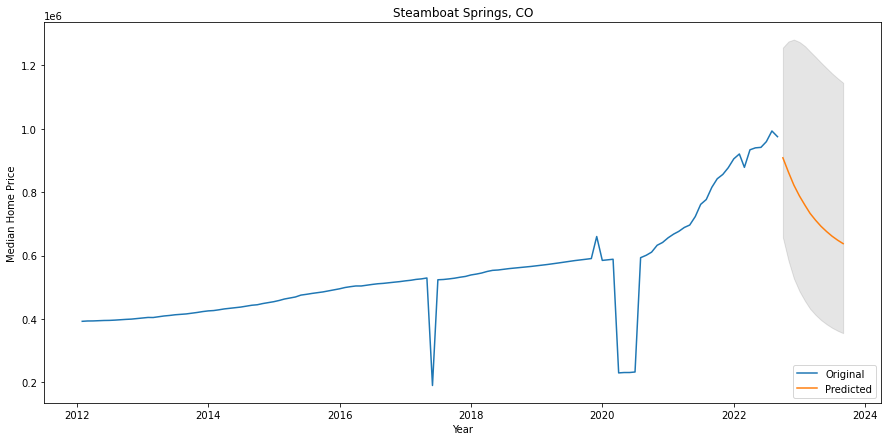

12 month forecast: 637581
95% confidence that the true future value is between 354894, and 1145437


In [34]:
plot_results(14, 12, zillow_data_2012)

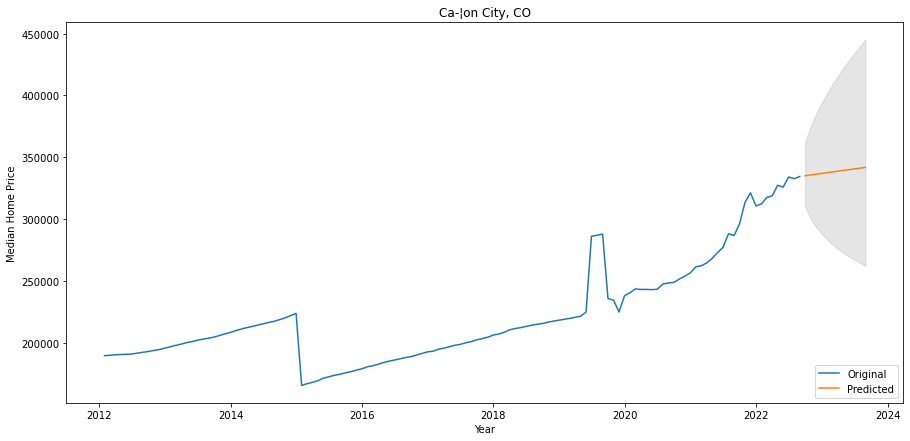

12 month forecast: 341773
95% confidence that the true future value is between 262399, and 445157


In [35]:
plot_results(11, 12, zillow_data_2012)

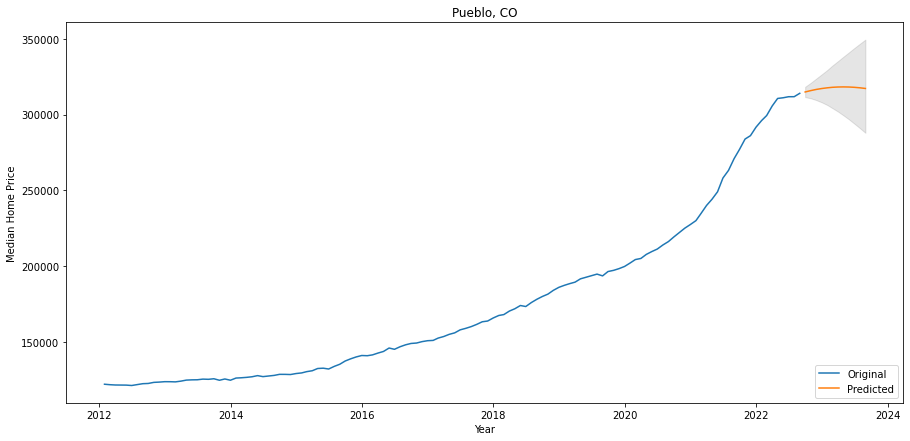

12 month forecast: 317215
95% confidence that the true future value is between 287924, and 349486


In [37]:
plot_results(5, 12, zillow_data_2012)

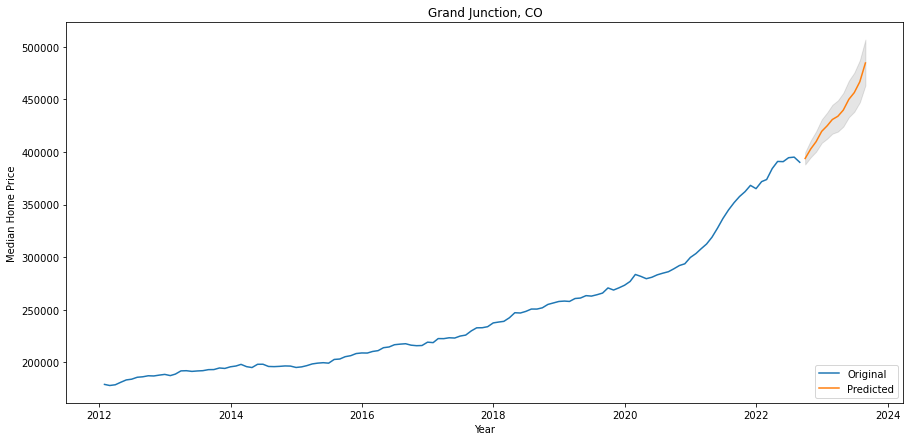

12 month forecast: 484651
95% confidence that the true future value is between 463377, and 506901


In [38]:
plot_results(6, 12, zillow_data_2012)

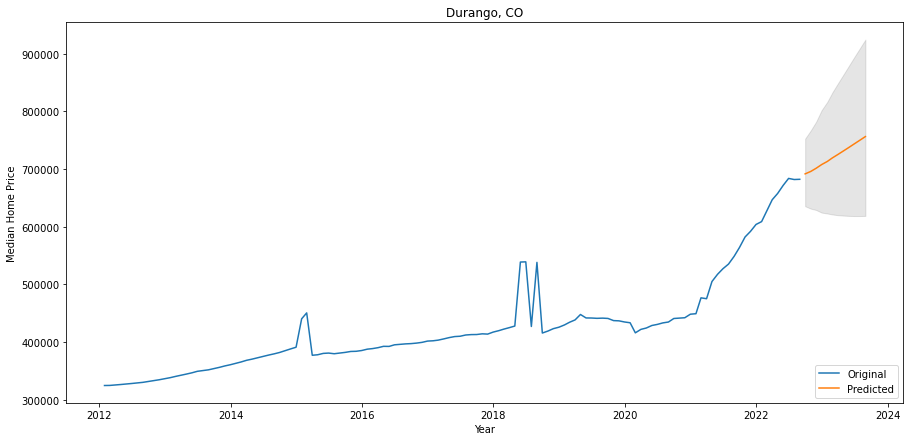

12 month forecast: 756195
95% confidence that the true future value is between 618647, and 924325


In [39]:
plot_results(8, 12, zillow_data_2012)